In [ ]:
# pip install imbalanced-learn

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE

In [2]:
df_original = pd.read_csv("/kaggle/input/health-and-fitness-dataset/health_fitness_dataset.csv")
df_original

,participant_id,date,age,gender,height_cm,weight_kg,bmi,activity_type,duration_minutes,intensity,...,resting_heart_rate,blood_pressure_systolic,blood_pressure_diastolic,endurance_level,sleep_hours,stress_level,hydration_level,smoking_status,health_condition,fitness_level
0,1,2024/1/1,56,F,165.3,50.55,18.50,Dancing,42.1,Low,...,69.5,110.7,72.9,5.37,6.6,4,1.5,Never,NaN,0.04
1,1,2024/1/4,56,F,165.3,55.38,20.27,Swimming,66.9,Low,...,69.5,110.7,72.9,5.39,8.1,3,1.8,Never,NaN,0.07
2,1,2024/1/5,56,F,165.3,56.49,20.68,Swimming,20.0,Medium,...,69.5,110.7,72.9,5.42,6.2,5,2.7,Never,NaN,0.09
3,1,2024/1/7,56,F,165.3,52.23,19.12,Weight Training,23.5,Medium,...,69.5,110.7,72.9,5.44,7.2,4,2.6,Never,NaN,0.21
4,1,2024/1/9,56,F,165.3,53.96,19.75,Swimming,75.0,Medium,...,69.5,110.7,72.9,5.47,7.1,7,1.5,Never,NaN,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687696,3000,2024/12/19,38,F,165.7,57.06,20.78,Basketball,109.6,Medium,...,66.5,127.0,75.5,11.29,7.4,4,1.9,Never,NaN,17.13
687697,3000,2024/12/20,38,F,165.7,55.24,20.12,Basketball,145.3,Low,...,66.5,127.0,75.5,11.31,8.5,5,2.6,Never,NaN,17.16
687698,3000,2024/12/21,38,F,165.7,60.26,21.95,Yoga,84.9,Low,...,66.5,127.0,75.5,11.34,8.2,4,1.8,Never,NaN,17.26
687699,3000,2024/12/22,38,F,165.7,59.30,21.60,Basketball,107.1,Medium,...,66.5,127.0,75.5,11.36,8.5,6,2.1,Never,NaN,17.39


In [3]:
df_original.columns

Index(['participant_id', 'date', 'age', 'gender', 'height_cm', 'weight_kg',
       'bmi', 'activity_type', 'duration_minutes', 'intensity',
       'calories_burned', 'daily_steps', 'avg_heart_rate',
       'resting_heart_rate', 'blood_pressure_systolic',
       'blood_pressure_diastolic', 'endurance_level', 'sleep_hours',
       'stress_level', 'hydration_level', 'smoking_status', 'health_condition',
       'fitness_level'],
      dtype='object')

In [4]:
df_original.isnull().sum()

participant_id                   0
date                             0
age                              0
gender                           0
height_cm                        0
weight_kg                        0
bmi                              0
activity_type                    0
duration_minutes                 0
intensity                        0
calories_burned                  0
daily_steps                      0
avg_heart_rate                   0
resting_heart_rate               0
blood_pressure_systolic          0
blood_pressure_diastolic         0
endurance_level                  0
sleep_hours                      0
stress_level                     0
hydration_level                  0
smoking_status                   0
health_condition            490275
fitness_level                    0
dtype: int64

In [5]:
df_original["activity_type"].value_counts()

activity_type
Yoga               69961
Weight Training    69661
HIIT               69376
Dancing            69193
Cycling            69187
Basketball         68536
Tennis             68533
Walking            68077
Swimming           68032
Running            67145
Name: count, dtype: int64

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   participant_id            687701 non-null  int64  
 1   date                      687701 non-null  object 
 2   age                       687701 non-null  int64  
 3   gender                    687701 non-null  object 
 4   height_cm                 687701 non-null  float64
 5   weight_kg                 687701 non-null  float64
 6   bmi                       687701 non-null  float64
 7   activity_type             687701 non-null  object 
 8   duration_minutes          687701 non-null  float64
 9   intensity                 687701 non-null  object 
 10  calories_burned           687701 non-null  float64
 11  daily_steps               687701 non-null  int64  
 12  avg_heart_rate            687701 non-null  int64  
 13  resting_heart_rate        687701 non-null  f

# Data Preprocessing

In [7]:
df = df_original.copy()

In [8]:
df.drop(columns=['participant_id','date'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       687701 non-null  int64  
 1   gender                    687701 non-null  object 
 2   height_cm                 687701 non-null  float64
 3   weight_kg                 687701 non-null  float64
 4   bmi                       687701 non-null  float64
 5   activity_type             687701 non-null  object 
 6   duration_minutes          687701 non-null  float64
 7   intensity                 687701 non-null  object 
 8   calories_burned           687701 non-null  float64
 9   daily_steps               687701 non-null  int64  
 10  avg_heart_rate            687701 non-null  int64  
 11  resting_heart_rate        687701 non-null  float64
 12  blood_pressure_systolic   687701 non-null  float64
 13  blood_pressure_diastolic  687701 non-null  f

In [10]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['gender', 'activity_type', 'intensity', 'smoking_status',
       'health_condition'],
      dtype='object')

In [11]:
df['gender'].value_counts()

gender
F        338856
M        334023
Other     14822
Name: count, dtype: int64

In [12]:
df['intensity'].value_counts()

intensity
Medium    343433
Low       206911
High      137357
Name: count, dtype: int64

In [13]:
df['smoking_status'].value_counts()

smoking_status
Never      416800
Former     164570
Current    106331
Name: count, dtype: int64

In [14]:
df['health_condition'].value_counts()

health_condition
Hypertension    99437
Diabetes        64754
Asthma          33235
Name: count, dtype: int64

In [15]:
df["health_condition"] = df["health_condition"].fillna("None")

## OneHot Encording

In [16]:
from sklearn.preprocessing import OneHotEncoder

def oneHotEncodeAndAdd(df, column):
    one_hot_encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded, columns= one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = df.index
    df = pd.concat([df, encoded_columns], axis=1)
    df = df.drop(columns=[column])
    return df

In [17]:
columns_to_encode = ['gender','smoking_status', 'health_condition']

for col in columns_to_encode:
    df = oneHotEncodeAndAdd(df, col)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            687701 non-null  int64  
 1   height_cm                      687701 non-null  float64
 2   weight_kg                      687701 non-null  float64
 3   bmi                            687701 non-null  float64
 4   activity_type                  687701 non-null  object 
 5   duration_minutes               687701 non-null  float64
 6   intensity                      687701 non-null  object 
 7   calories_burned                687701 non-null  float64
 8   daily_steps                    687701 non-null  int64  
 9   avg_heart_rate                 687701 non-null  int64  
 10  resting_heart_rate             687701 non-null  float64
 11  blood_pressure_systolic        687701 non-null  float64
 12  blood_pressure_diastolic      

- Drop one column from each one-hot encoded column to avoid redundancy  

In [19]:
df.drop(columns=['smoking_status_Never','gender_Other','health_condition_None'], inplace=True)

## Label Encording

In [20]:
# intensity
# Medium    343433
# Low       206911
# High      137357
df['intensity'] = pd.Categorical(df['intensity'], categories=['Low', 'Medium', 'High'], ordered=True)
df['intensity'] = df['intensity'].cat.codes
print(f"{df['intensity'].value_counts()}")

intensity
1    343433
0    206911
2    137357
Name: count, dtype: int64


# Clustering

In [21]:
# Features for clustering
cluster_features = [
    "age", "height_cm", "weight_kg", "bmi", "duration_minutes", 
    "intensity", "calories_burned", "daily_steps", "avg_heart_rate",
    "resting_heart_rate", "blood_pressure_systolic", "blood_pressure_diastolic",
    "endurance_level", "sleep_hours", "stress_level", "hydration_level",
    "fitness_level","gender_F", "gender_M", 
    "smoking_status_Current", "smoking_status_Former",
    "health_condition_Asthma", "health_condition_Diabetes", "health_condition_Hypertension"
]

X_cluster = df[cluster_features]

## Scale numeric features

- Unless some features may dominate others

In [22]:
from sklearn.preprocessing import StandardScaler

num_cols = [
    "age", "height_cm", "weight_kg", "bmi", "duration_minutes",
    "intensity", "calories_burned", "daily_steps", "avg_heart_rate",
    "resting_heart_rate", "blood_pressure_systolic", "blood_pressure_diastolic",
    "endurance_level", "sleep_hours", "stress_level", "hydration_level",
    "fitness_level"
]

scaler = StandardScaler()
X_cluster[num_cols] = scaler.fit_transform(X_cluster[num_cols])

/tmp/ipykernel_360/255136297.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster[num_cols] = scaler.fit_transform(X_cluster[num_cols])


## KMeans clustering

In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_cluster)

### Silhouette Score

In [24]:
import numpy as np
from sklearn.metrics import silhouette_score
sample_idx = np.random.choice(len(X_cluster), 50000, replace=False)
sil_score = silhouette_score(X_cluster.iloc[sample_idx], df["cluster"].iloc[sample_idx])
print("Silhouette Score (sampled):", sil_score)

Silhouette Score (sampled): 0.07058948272390908


In [25]:
cluster_activity = df.groupby("cluster")["activity_type"].value_counts(normalize=True).unstack()
cluster_activity

activity_type,Basketball,Cycling,Dancing,HIIT,Running,Swimming,Tennis,Walking,Weight Training,Yoga
cluster,,,,,,,,,,
0,0.098383,0.101623,0.101699,0.092801,0.094973,0.096906,0.099526,0.103915,0.101876,0.108298
1,0.099564,0.097335,0.102145,0.091011,0.090025,0.098994,0.098336,0.107050,0.103907,0.111633
2,0.100166,0.100518,0.099736,0.099024,0.097202,0.100573,0.099110,0.099227,0.102090,0.102356
3,0.097302,0.095796,0.105630,0.094379,0.092617,0.100825,0.099791,0.104168,0.102684,0.106807
4,0.103201,0.107763,0.093474,0.129326,0.114306,0.097762,0.101578,0.079169,0.095690,0.077730


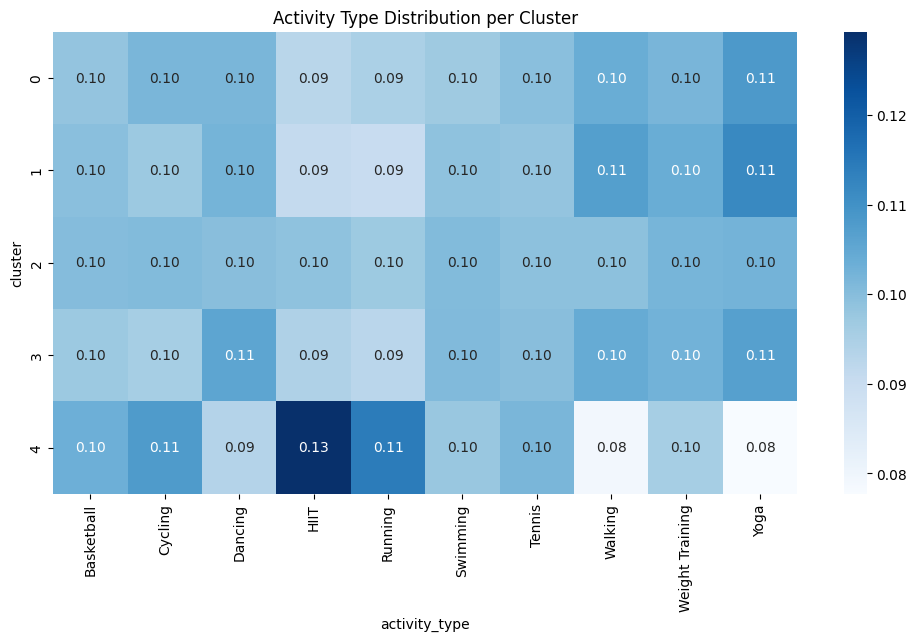

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(cluster_activity, annot=True, fmt=".2f", cmap="Blues")
plt.title("Activity Type Distribution per Cluster")
plt.show()

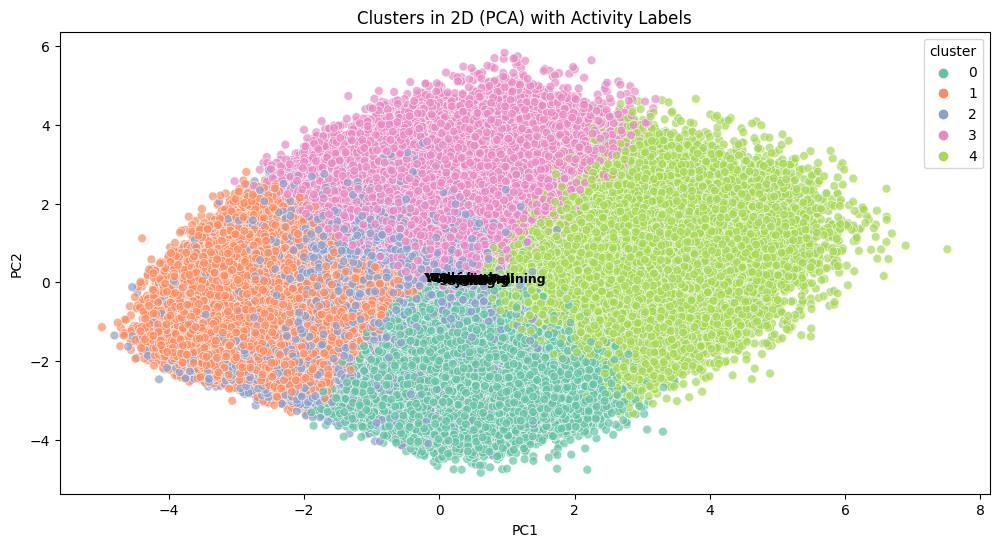

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

# Create a dataframe for plotting with activity_type
plot_df = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "cluster": df["cluster"],
    "activity_type": df["activity_type"]
})

# Scatter plot with clusters
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=plot_df,
    x="PC1", y="PC2",
    hue="cluster",
    palette="Set2",
    s=40,
    alpha=0.7
)

# Overlay activity labels (optional: annotate only centroids for readability)
centroids = plot_df.groupby("activity_type")[["PC1","PC2"]].mean()
for activity, (x, y) in centroids.iterrows():
    plt.text(x, y, activity, fontsize=9, weight="bold")

plt.title("Clusters in 2D (PCA) with Activity Labels")
plt.show()


### Feature relevance on all feature-cluster

In [28]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

features = [
    "age", "height_cm", "weight_kg", "bmi", "duration_minutes",
    "intensity", "calories_burned", "daily_steps", "avg_heart_rate",
    "resting_heart_rate", "blood_pressure_systolic", "blood_pressure_diastolic",
    "endurance_level", "sleep_hours", "stress_level", "hydration_level",
    "fitness_level",
    "gender_F", "gender_M", 
    "smoking_status_Current", "smoking_status_Former", 
    "health_condition_Asthma", "health_condition_Diabetes", "health_condition_Hypertension"
]

X = df[features]
y = df["cluster"]

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print(importances)


fitness_level                    0.162264
avg_heart_rate                   0.130437
endurance_level                  0.118814
weight_kg                        0.110707
height_cm                        0.099106
duration_minutes                 0.066658
intensity                        0.051300
daily_steps                      0.046148
gender_M                         0.039871
age                              0.035028
calories_burned                  0.033888
gender_F                         0.030985
bmi                              0.022217
resting_heart_rate               0.008744
blood_pressure_diastolic         0.008723
blood_pressure_systolic          0.008667
sleep_hours                      0.008250
hydration_level                  0.007236
stress_level                     0.005601
smoking_status_Former            0.001375
smoking_status_Current           0.001210
health_condition_Hypertension    0.001167
health_condition_Diabetes        0.000968
health_condition_Asthma          0

## Activity based clustering

In [29]:
######################################################
# fitness_level                    0.154723 
# avg_heart_rate                   0.131185 >
# endurance_level                  0.123246 
# weight_kg                        0.107491 
# height_cm                        0.097616 
# duration_minutes                 0.064992 >
# intensity                        0.050382 >
# daily_steps                      0.049402 
# gender_M                         0.038701
# age                              0.035913
# gender_F                         0.035628
# calories_burned                  0.034500 >

# activity_features = df.groupby("activity_type")[["gender_F",gender_M","age","height_cm","weight_kg","endurance_level","fitness_level","duration_minutes","avg_heart_rate","calories_burned","intensity","daily_steps"]].mean()
# kmeans_activities = KMeans(n_clusters=5, random_state=42)
# activity_features["activity_cluster"] = kmeans_activities.fit_predict(activity_features)

In [30]:
from sklearn.cluster import KMeans

activity_features = df.groupby("activity_type")[["duration_minutes","avg_heart_rate","calories_burned","intensity"]].mean()
kmeans_activities = KMeans(n_clusters=5, random_state=42)
activity_features["activity_cluster"] = kmeans_activities.fit_predict(activity_features)

In [31]:
activity_features

,duration_minutes,avg_heart_rate,calories_burned,intensity,activity_cluster
activity_type,,,,,
Basketball,73.864238,131.378881,17.357854,0.896244,2
Cycling,74.425188,131.552271,18.498666,0.899851,2
Dancing,73.991251,131.389201,11.990842,0.901117,1
HIIT,73.805884,131.342265,25.994067,0.895800,0
Running,74.191888,131.422787,21.327712,0.899084,2
Swimming,73.525584,131.513964,15.188164,0.898856,4
Tennis,74.079907,131.497512,15.846564,0.897495,4
Walking,74.017141,131.385916,8.229493,0.898277,3
Weight Training,74.189542,131.598570,13.040469,0.902255,1


### Silhouette Score for activity-based Clusters

In [32]:
from sklearn.metrics import silhouette_score

X = activity_features[["duration_minutes", "avg_heart_rate", "calories_burned", "intensity"]]

sil_score = silhouette_score(X, activity_features["activity_cluster"])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.42948704503266166


### Plotting Clusters

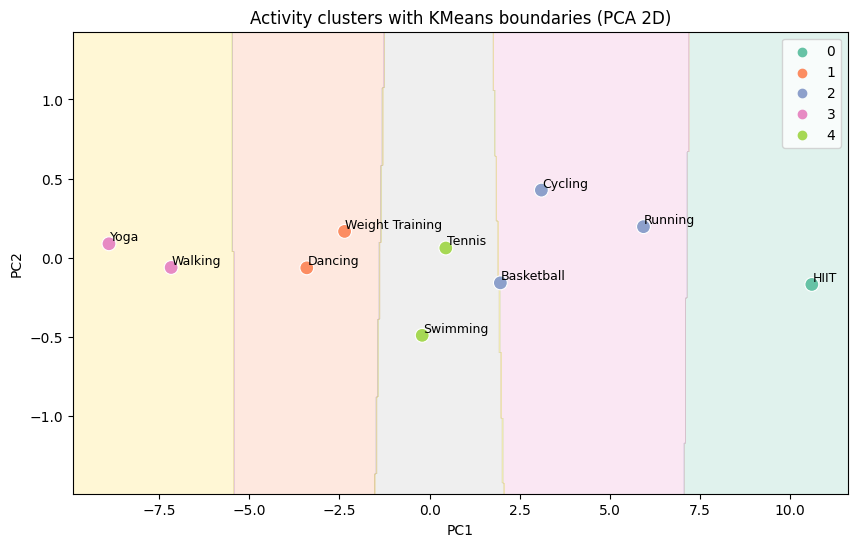

In [33]:
import numpy as np

pca = PCA(n_components=2, random_state=42)
activity_pca = pca.fit_transform(activity_features[["duration_minutes","avg_heart_rate","calories_burned","intensity"]])

# Extract PCA components
X = activity_pca
y = activity_features["activity_cluster"]

# Fit KMeans again in 2D PCA space
kmeans_2d = KMeans(n_clusters=5, random_state=42)
kmeans_2d.fit(X)
y_pred = kmeans_2d.labels_

# Create meshgrid for contour
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict cluster for each point in the grid
Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap="Set2")
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, s=100, palette="Set2")

# Annotate activities
for i, txt in enumerate(activity_features.index):
    plt.text(X[i,0]+0.02, X[i,1]+0.02, txt, fontsize=9)

plt.title("Activity clusters with KMeans boundaries (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Map Activity cluster to existing df 

In [34]:
cluster_map = activity_features["activity_cluster"].to_dict()

df["activity_cluster"] = df["activity_type"].map(cluster_map)

df[["activity_type", "cluster", "activity_cluster"]].head(10)

,activity_type,cluster,activity_cluster
0,Dancing,1,1
1,Swimming,1,4
2,Swimming,1,4
3,Weight Training,1,1
4,Swimming,1,4
5,HIIT,1,0
6,Weight Training,2,1
7,HIIT,1,0
8,HIIT,1,0
9,Weight Training,1,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687701 entries, 0 to 687700
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            687701 non-null  int64  
 1   height_cm                      687701 non-null  float64
 2   weight_kg                      687701 non-null  float64
 3   bmi                            687701 non-null  float64
 4   activity_type                  687701 non-null  object 
 5   duration_minutes               687701 non-null  float64
 6   intensity                      687701 non-null  int8   
 7   calories_burned                687701 non-null  float64
 8   daily_steps                    687701 non-null  int64  
 9   avg_heart_rate                 687701 non-null  int64  
 10  resting_heart_rate             687701 non-null  float64
 11  blood_pressure_systolic        687701 non-null  float64
 12  blood_pressure_diastolic      

# Classification Model

### Class Value count

In [36]:
df["activity_cluster"].value_counts()

activity_cluster
2    204868
1    138854
3    138038
4    136565
0     69376
Name: count, dtype: int64

- Since the classes are imbalanced, let's select a method to address this issue

## Sampling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feature_cols = [
    "age", "height_cm", "weight_kg", "bmi", "duration_minutes",
    "intensity", "calories_burned", "daily_steps", "avg_heart_rate",
    "resting_heart_rate", "blood_pressure_systolic", "blood_pressure_diastolic",
    "endurance_level", "sleep_hours", "stress_level", "hydration_level",
    "fitness_level", "gender_F", "gender_M",
    "smoking_status_Current", "smoking_status_Former",
    "health_condition_Asthma", "health_condition_Diabetes", "health_condition_Hypertension"
]

X = df[feature_cols]
y = df["activity_cluster"]

- Scale numerical columns

In [38]:
num_cols = [
    "age", "height_cm", "weight_kg", "bmi", "duration_minutes",
    "intensity", "calories_burned", "daily_steps", "avg_heart_rate",
    "resting_heart_rate", "blood_pressure_systolic", "blood_pressure_diastolic",
    "endurance_level", "sleep_hours", "stress_level", "hydration_level",
    "fitness_level"
]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

/tmp/ipykernel_360/2827964060.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### 1️. Random Oversampling

In [41]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

rf_ros = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_ros.fit(X_ros, y_ros)
y_pred_ros = rf_ros.predict(X_test)

print("=== Random Oversampling ===")
print(classification_report(y_test, y_pred_ros))

=== Random Oversampling ===
              precision    recall  f1-score   support

           0       0.71      0.37      0.48     13875
           1       0.41      0.37      0.39     27771
           2       0.53      0.56      0.54     40974
           3       0.49      0.81      0.61     27608
           4       0.43      0.26      0.32     27313

    accuracy                           0.49    137541
   macro avg       0.51      0.47      0.47    137541
weighted avg       0.49      0.49      0.47    137541



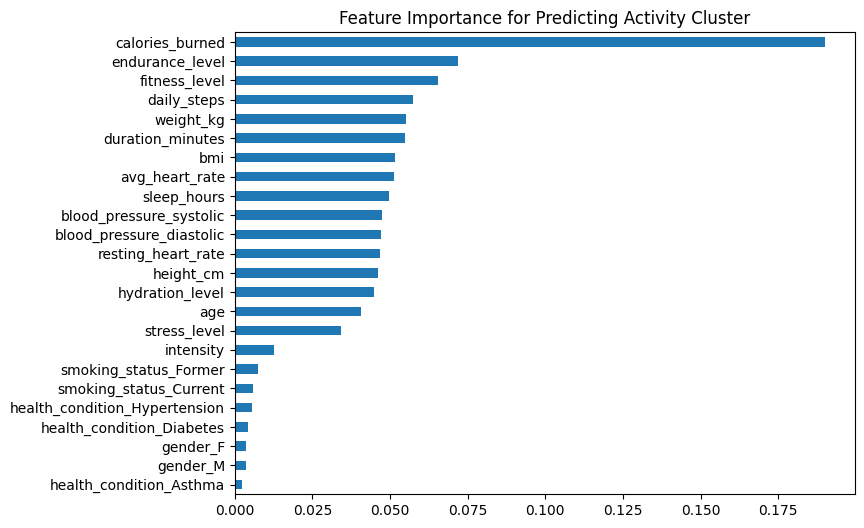

In [42]:
import matplotlib.pyplot as plt

importances = pd.Series(rf_ros.feature_importances_, index=feature_cols)
importances.sort_values(ascending=True).plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance for Predicting Activity Cluster")
plt.show()

### 2. Random Undersampling

In [43]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

rf_rus = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_rus.fit(X_rus, y_rus)
y_pred_rus = rf_rus.predict(X_test)

print("=== Random Undersampling ===")
print(classification_report(y_test, y_pred_rus))

=== Random Undersampling ===
              precision    recall  f1-score   support

           0       0.41      0.54      0.47     13875
           1       0.36      0.37      0.37     27771
           2       0.55      0.27      0.36     40974
           3       0.46      0.82      0.59     27608
           4       0.36      0.29      0.32     27313

    accuracy                           0.43    137541
   macro avg       0.43      0.46      0.42    137541
weighted avg       0.44      0.43      0.41    137541



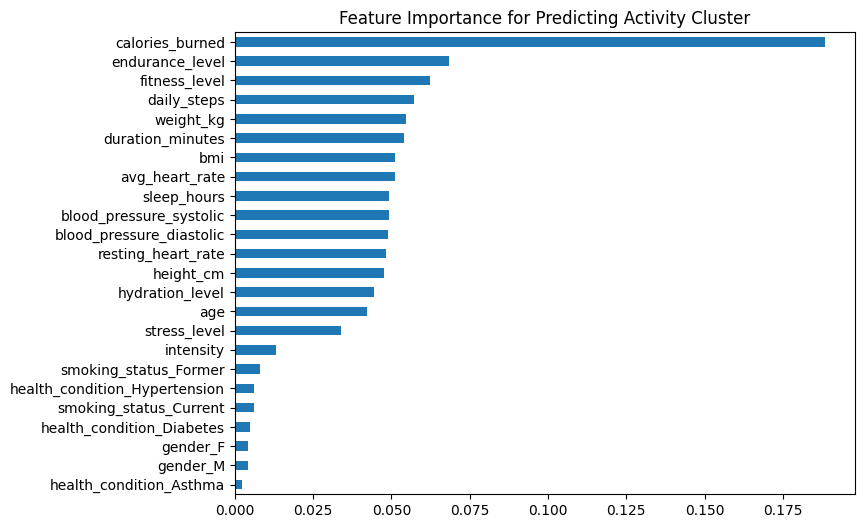

In [44]:
import matplotlib.pyplot as plt

importances = pd.Series(rf_rus.feature_importances_, index=feature_cols)
importances.sort_values(ascending=True).plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance for Predicting Activity Cluster")
plt.show()

### 3️. SMOTE

In [45]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_smote.fit(X_smote, y_smote)
y_pred_smote = rf_smote.predict(X_test)

print("=== SMOTE ===")
print(classification_report(y_test, y_pred_smote))

=== SMOTE ===
              precision    recall  f1-score   support

           0       0.61      0.39      0.48     13875
           1       0.37      0.36      0.37     27771
           2       0.52      0.47      0.49     40974
           3       0.47      0.81      0.60     27608
           4       0.38      0.25      0.30     27313

    accuracy                           0.46    137541
   macro avg       0.47      0.46      0.45    137541
weighted avg       0.46      0.46      0.45    137541



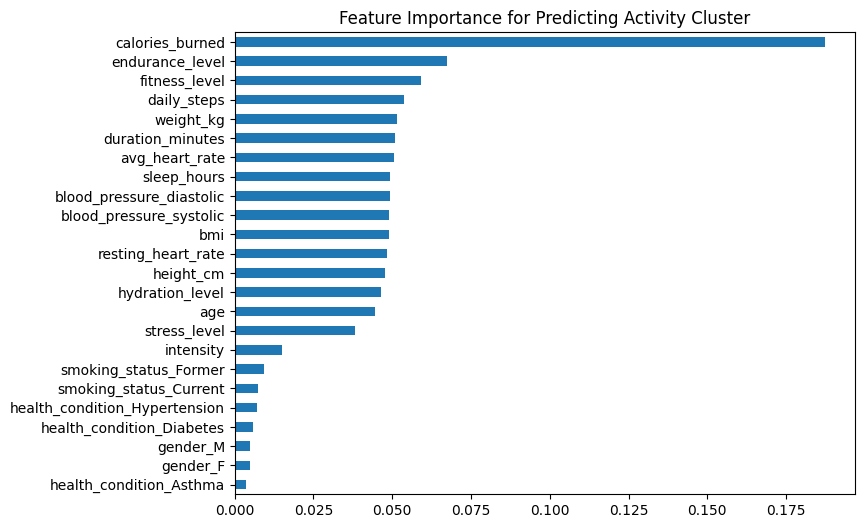

In [46]:
import matplotlib.pyplot as plt

importances = pd.Series(rf_smote.feature_importances_, index=feature_cols)
importances.sort_values(ascending=True).plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance for Predicting Activity Cluster")
plt.show()

- Catboost classifier with built-in class imbalance handling

In [48]:
# feature_cols = [
#     "age", "height_cm", "weight_kg", "bmi", "duration_minutes",
#     "intensity", "calories_burned", "daily_steps", "avg_heart_rate",
#     "resting_heart_rate", "blood_pressure_systolic", "blood_pressure_diastolic",
#     "endurance_level", "sleep_hours", "stress_level", "hydration_level",
#     "fitness_level", "gender_F", "gender_M",
#     "smoking_status_Current", "smoking_status_Former",
#     "health_condition_Asthma", "health_condition_Diabetes", "health_condition_Hypertension"
# ]

# X = df[feature_cols]
# y = df["activity_cluster"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# from catboost import CatBoostClassifier

# model = CatBoostClassifier(
#     iterations=900,
#     learning_rate=0.1,
#     depth=6,
#     auto_class_weights='Balanced',
#     random_state=42,
#     verbose=100
# )
# model.fit(X_train, y_train, eval_set=(X_test, y_test))

# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred, digits=4))

In [49]:
# import matplotlib.pyplot as plt

# importances = pd.Series(model.feature_importances_, index=feature_cols)
# importances.sort_values(ascending=True).plot(kind="barh", figsize=(8,6))
# plt.title("Feature Importance for Predicting Activity Cluster")
# plt.show()

In [50]:
df.to_csv('clustered_data.csv', index=False)